# Import the Modules

In [126]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import scipy.stats as stats
%run mpFunctions.py

# Import the Datasets

In [10]:
peopleFilepath = './Data/pickledPeople.pkl'
voteFilepath = './Data/pickledVotes_unpacked.pkl'
routeFilepath = './Data/pickledRoutes_unpacked.pkl'

people = pd.read_pickle(peopleFilepath)
votes = pd.read_pickle(voteFilepath)
routes = pd.read_pickle(routeFilepath)

# Isolate the datasets of interest / Prep for Mann-Whitney Test

Number of Sport/Trad Routes (NO OVERLAP)
There are 66706 Sport Routes
There are 56548 Trad Routes



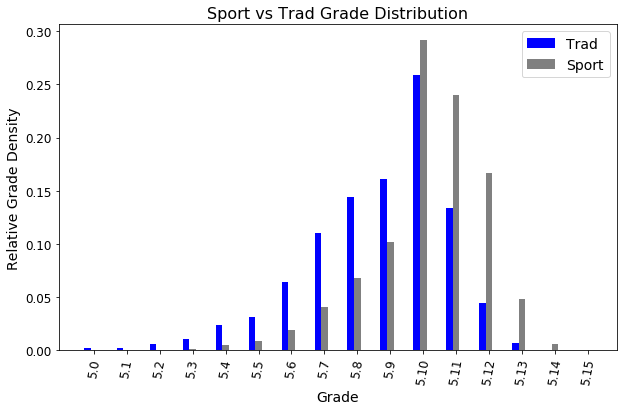

In [131]:
# Isolate routes that are Trad from Sport (NO OVERLAP)
sport = routes.loc[(routes['sport']==True) & (routes['trad']==False)]['simpleDiffRating']
trad = routes.loc[(routes['trad']==True) & (routes['sport']==False)]['simpleDiffRating']

# Look at the length of each
print("Number of Sport/Trad Routes (NO OVERLAP)")
print("There are {:.0f} Sport Routes".format(len(sport)))
print("There are {:.0f} Trad Routes".format(len(trad)))
print()

# Reduce the ratings to 5.0-5.15, and convert them into dictionaries with density information
# After these 3 lines, sport and trad will be a list of density values for the ratings in 'ratings', and sorted in the same order as the 'ratings' list
ratings = ['5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13', '5.14', '5.15']
sport = list(countRatings(reduceRatings(sport), density=True).values())
trad = list(countRatings(reduceRatings(trad), density=True).values())

plot_sport_vs_trad_simple(sport, trad)

# NOTE ON FUNCTIONS:
# The reduceRatings function & the countRatings function are defined in mpFunctions.py


# Perform the Mann-Whitney Test

In [130]:
"""
NOTE ON MANN-WHITNEY TEST:
THE MW-Test is a nonparametric test of the null hypothesis that it is equally likely 
that a randomly selected value from one sample will be less than or greater than a
randomly selected value from a second sample.

Null Hypothesis: Populations DO HAVE the same distribution
"""

# Perform the Mann-Whitney Test
u_Statistic, p_Value = stats.mannwhitneyu(sport, trad)
print("MANN-WHITNEY U-TEST RESULTS")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("The U-Stat for MW-Test is {:0.3f}".format(u_Statistic))
print("The P-Value for MW-Test is {:0.3f}".format(p_Value))

MANN-WHITNEY U-TEST RESULTS
~~~~~~~~~~~~~~~~~~~~~~~~~~~
The U-Stat for MW-Test is 117.000
The P-Value for MW-Test is 0.346
